(irk-exercises-section)=

# Implicit Runge-Kutta methods exercises


`````{exercise}
:label: ch3-ex-radauIA-order

Determine the order of the DIRK method shown below.

$$ \begin{array}{c|cc}
    \frac{1}{4} & \frac{1}{4} \\
    \frac{3}{4} & \frac{1}{2} & \frac{1}{4} \\ \hline
    & \frac{1}{2} & \frac{1}{2}
\end{array} $$

```{dropdown} Solution
This DIRK method is a second-order method.
```
`````

`````{exercise}
:label: ch3-ex-radauIIA-derivation

Derive a third-order Radau IIA method. Present your method in a Butcher tableau.

```{dropdown} Solution
$$ \begin{array}{c|cc}
    \frac{1}{3} & \frac{5}{12} & -\frac{1}{12} \\
    1 & \frac{3}{4} & \frac{1}{4} \\ \hline
    & \frac{3}{4} & \frac{1}{4}
\end{array} $$
```
`````

`````{exercise}
:label: ch3-ex-stiff

Consider following IVP

$$ \begin{align*}
  y_1' &= -1000 y_1 + y_2, & y_1(0) &= 1, \\
  y_2' &= -y_2, & y_2(0) &= 1.
\end{align*} $$

(a) &emsp; Compute the solution to this IVP over $t\in [0, 5]$ using the Radau IIA method from {ref}`ch3-ex-radauIIA-derivation` with a step length of $h = 1$. Produce a plot of the solutions to $y_1$ and $y_2$ against $t$.

````{dropdown} Solution
```{glue:figure} ex3.3_plot
```
````

(b) &emsp; Attempt to solve this IVP using the RK4 method with the same step length. What do you notice about the result?

```{dropdown} Solution
The solution is unstable (you should see an error message).
```

(c) &emsp; Solve this IVP using the {prf:ref}`Fehlberg 4(5)<fehlbergs-method-equation>` explicit Runge-Kutta method. Record the time taken for both methods to compute the solution and determine value of the smallest step length used in the Fehlberg's method solution. What does this suggest about this system?

````{dropdown} Solution
The RadauIIA method took 0.005 seconds to compute whereas the Runge-Kutta Fehlberg 4(5) method took 0.265 seconds to compute (these times will vary depending on the machine used). The smallest step length used in Fehlberg's method was $h = 8.8\times 10^{-07}$. This suggests that this is a stiff system since the minimum step length used in Fehlberg's is very small compared to the one used for the Radau IIA method.
````
`````

<!-- `````{exercise}
:label: ch3-ex-robertson

The {cite:t}`robertson:1966` model describes the following chemical reaction between three chemicals

$$ \begin{align*}
    A &\xrightarrow{k_1} B, \\
    B &\xrightarrow{k_2} C, \\
    B + B &\xrightarrow{k_3} C,
\end{align*} $$

where $A$, $B$ and $C$ are the concentration of the three chemicals and $k_1 = 0.04$, $k_2 = 3 \times 10^{7}$ and $k_3 = 10^{4}$ are parameters determining the reaction rates. Writing these as a system of ODEs gives

$$ \begin{align*}
    \frac{\mathrm{d}A}{\mathrm{d}t} &= -k_1A, \\
    \frac{\mathrm{d}B}{\mathrm{d}t} &= k_1A - k_2B - k_3B^2, \\
    \frac{\mathrm{d}C}{\mathrm{d}t} &= k_2B + k_3B^2.
\end{align*} $$

(a) &emsp; Write a Python or MATLAB program to solve the Robertson model over $t \in [0, 100]$, with initial values $A(0) = 1$ and $B(0) = C(0) = 0$ using the Radau IIA model from {ref}`ch3-ex-radauIIA-derivation` with a step length of $h = 1$. Produce a plot of the concentrations of the three chemicals over $t$ on the same axes, with $B$ multiplied by a scaling factor of $10^5$ so that it is visible on the plot.

````{dropdown} Solution
```{glue:figure} ex3.3_plot
```
````

(b) &emsp; Solve the same IVP using the [Fehlberg 5(4) ERK method](ssc-code-section). Determine the smallest step length used throughout the solution.

```{dropdown} Solution
The smallest step length used by the Fehlberg 5(4) method was $h = 1.48 \times 10^{-4}$
```


(c) &emsp; Comment on the applicability of the two methods used here to solve this IVP. Why do your think one method took longer than the other?

```{dropdown} Solution
The Fehlberg 5(4) ERK method took much longer than the Radau IIA IRK method to compute the solution. This was because the chemical reaction is violent as indicated by the plot of the solution which shows the concentration of $B$ increasing rapidly shortly after the start of the reaction. This means the Fehlberg 5(4) ERK method is having to use a very small step length to ensure a stable solution. The Robertson model is an example of a stiff problem which the Radau class of IRK methods are more suited to solving than an ERK method (stiffness is covered in the [next chapter](stiffness-section)).
```
````` -->


minimum step length = 8.80e-07
number of successful steps: 9394
numebr of failed steps: 12
number of function evaluations: 56436
1
RK4 time: 0.060
RKF45 time: 0.273
radauIIA time: :0.005


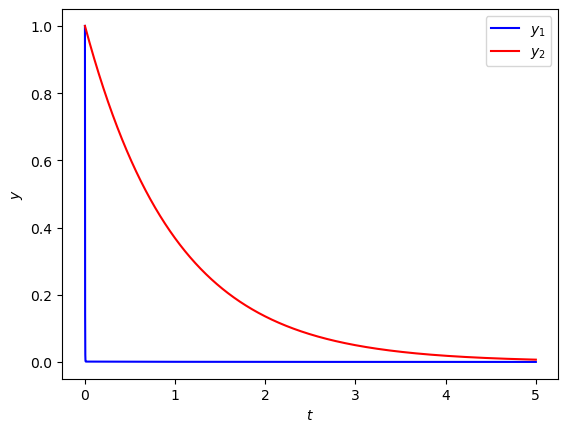

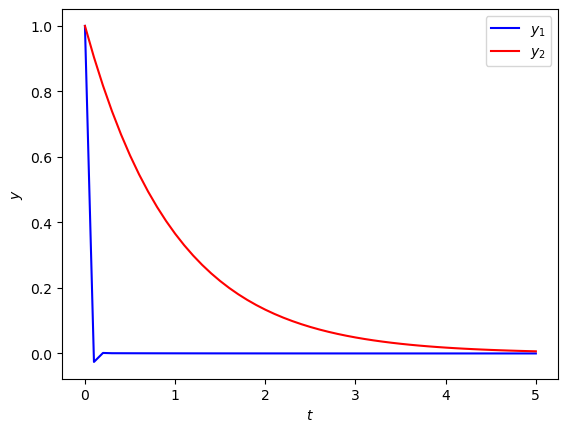

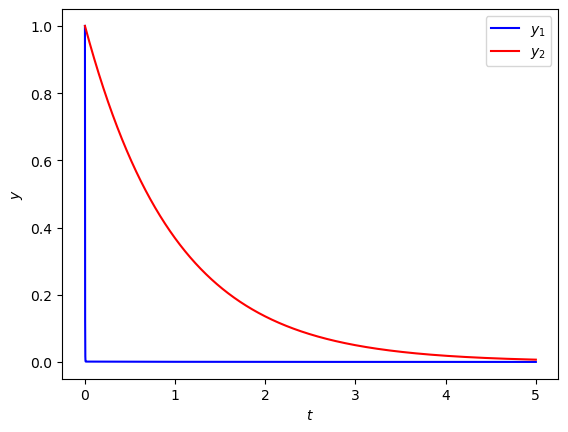

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import time

def jac(f, t, y):
    J = np.zeros((len(y), len(y)))
    epsilon = 1e-6
    for i in range(len(y)):
        y_plus_epsilon = y.astype(float)
        y_minus_epsilon = y.astype(float)
        y_plus_epsilon[i] += epsilon
        y_minus_epsilon[i] -= epsilon
        J[:,i] = (f(t, y_plus_epsilon) - f(t,y_minus_epsilon)) / (2 * epsilon)

    return J


def radauIIA(f, tpsan, y0, h):
    
    N = len(y0)
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((N, nsteps + 1))
    t[0] = tspan[0]
    y[:,0] = y0
    
    A = np.array([[1/3, -1/12],
                  [3/4, 1/4]])
    b = np.array([3/4, 1/4])
    c = np.array([1/3, 1])
    s = 2
    maxk = 0

    for n in range(nsteps):
        z = np.zeros(N * s)
        F = np.zeros(N * s)
        J = jac(f, t[n], y[:,n])
        for k in range(10):
            F[:N] = f(t[n] + c[0] * h, y[:,n] + z[:N])
            F[N:] = f(t[n] + c[1] * h, y[:,n] + z[N:])
            g = z - h * np.dot(np.kron(A, np.eye(N)), F)
            delta_z = np.linalg.solve(np.eye(N * s) - h * np.kron(A, J), -g)
            z += delta_z
            if np.linalg.norm(delta_z) < 1e-6:
                break

        maxk = max(k, maxk)
        
        y[:,n+1] = y[:,n] + h * np.dot(np.kron(b.T, np.eye(N)), F)
        t[n+1] = t[n] + h

    print(maxk)

    return t, y.T


def rk4(f, tspan, y0, h):
  
    nsteps = int((tspan[1] - tspan[0]) / h)
    N = len(y0)
    t = np.zeros(nsteps + 1)
    y = np.zeros((N, nsteps + 1))

    t[0] = tspan[0]
    y[:,0] = y0
    
    for n in range(nsteps):
        k1 = f(t[n], y[:,n])
        k2 = f(t[n] + 0.5 * h, y[:,n] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[:,n] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[:,n] + h * k3)
        y[:,n+1] = y[:,n] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4);
        t[n+1] = t[n] + h

    return t, y.T


def rkf45(f, tspan, y0, atol=1e-6, rtol=1e-3):
    
    N = len(y0)
    t = np.zeros(1000000)
    y = np.zeros((N, 1000000)) 
    t[0] = tspan[0]
    y[:,0] = y0
    
    h = 0.8 * rtol ** (1 / 5)
    n, nfail = 0, 0
    minh = 9999
    while t[n] < tspan[-1]:

        k1 = f(t[n], y[:,n])
        k2 = f(t[n] + 1/4 * h, y[:,n] + 1/4 * h * k1)
        k3 = f(t[n] + 3/8 * h, y[:,n] + h * (3/23 * k1 + 9/32 * k2))
        k4 = f(t[n] + 12/13 * h, y[:,n] + h * (1932/2197 * k1 - 7200/2197 * k2 + 7296/2197 * k3))
        k5 = f(t[n] + h, y[:,n] + h * (439/216 * k1 - 8 * k2 + 3680/513 * k3 - 845/4104 * k4))
        k6 = f(t[n] + 1/2 * h, y[:,n] + h * (-8/27 * k1 + 2 * k2 - 3544/2565 * k3 + 1859/4104 * k4 - 11/40 * k5))

        y5 = y[:,n] + h * (16/135 * k1 + 6656/12825 * k3 + 28561/56430 * k4 - 9/50 * k5 + 2/55 * k6)
        y4 = y[:,n] + h * (25/216 * k1 + 1408/2565 * k3 + 2197//4104 * k4 - 1/5 * k5)

        delta = np.linalg.norm(y5 - y4)
        tol = atol + rtol * np.linalg.norm(y5)
        if delta < tol:
            y[:,n+1] = y5
            t[n+1] = t[n] + h
            n += 1
        else:
            nfail += 1
        
        r = max(0.1, 0.8 * (tol / delta) ** (1/5))
        minh = min(r * h, minh)
        h = min(r * h, tspan[-1] - t[n])

    print(f"minimum step length = {minh:1.2e}")
    print(f"number of successful steps: {n}")
    print(f"numebr of failed steps: {nfail}")
    print(f"number of function evaluations: {6 * (n + nfail)}")

    return t[:n+1], y[:,:n+1].T


# Define Robertson's equations
def robertson(t, y):
    dA = -k1 * y[0]
    dB = k1 * y[0] - k2 * y[1] - k3 * y[2] ** 2
    dC = k2 * y[1] + k3 * y[1] ** 2
    return np.array([dA, dB, dC])


def f(t, y):
    return np.array([-1000 * y[0] + y[1], -y[1]])

# Define IVP
tspan = [0, 5]
y0 = [1, 1]
h = 0.1

# Solve IVP
start = time.time()
t_rk4, y_rk4 = rk4(f, tspan, y0, 0.001)
rk4_time = time.time() - start

start = time.time()
t_rkf45, y_rkf45 = rkf45(f, tspan, y0)
rkf45_time = time.time() - start

start = time.time()
t, y = radauIIA(f, tspan, y0, h)
radauIIA_time = time.time() - start

print(f"RK4 time: {rk4_time:0.3f}")
print(f"RKF45 time: {rkf45_time:0.3f}")
print(f"radauIIA time: :{radauIIA_time:0.3f}")

# Plot solution
fig, ax = plt.subplots()
plt.plot(t_rk4, y_rk4[:,0], "b", label="$y_1$")
plt.plot(t_rk4, y_rk4[:,1], "r", label="$y_2$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend()
plt.show()

from myst_nb import glue
glue("ex3.3_plot", fig, display=False)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b", label="$y_1$")
plt.plot(t, y[:,1], "r", label="$y_2$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend()
plt.show()

from myst_nb import glue
glue("ex3.3_plot", fig, display=False)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t_rkf45, y_rkf45[:,0], "b", label="$y_1$")
plt.plot(t_rkf45, y_rkf45[:,1], "r", label="$y_2$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend()
plt.show()

from myst_nb import glue
glue("ex3.3_plot", fig, display=False)